In [714]:
#importing standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [715]:
# Data Ingestion process starts

In [716]:
#importing the loan.csv file into df
loan = pd.read_csv('loan.csv')

In [717]:
# Data Understanding

In [718]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [719]:
# finding total rows and comuns before dropping the missing values

TotalRows = loan.shape[0]
TotalColumns = loan.shape[1] 
print (TotalRows,TotalColumns)

39717 111


In [720]:
# The target variable for our analysis is loan_status. Some of the important columns that impact the loan_status is loan_amount
# interest_rate, purpose of the loan, loan type, Grade, sub grade, annual income 

In [721]:
# Data Cleaning Process starts

In [722]:
#finding the missingvalues

missing = loan.isnull().sum()/ len(loan.index)* 100 

#round the values to the precision of 2
missing = round(missing,2)

print (missing)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


In [723]:
#Drop the columns that has 100% missing values
loan = loan.dropna(axis=1, how='all')

#Drop the rows that has 100% missing values
loan = loan.dropna(axis=0, how='all')


In [724]:
missing = loan.isnull().sum() * 100 / len(loan)

#round the values to the precision of 2
missing = round(missing,2)

print (missing)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [725]:
print(loan.shape[1])

57


In [726]:
#Drop the columns that has more than 50% missing values

loan.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis = 1, inplace = True)
     

In [727]:
#Drop all the columns that has same values in all the rows. they don't add any value to the analysis

for column in loan.columns:
    if len(loan[column].unique()) == 1:
        loan.drop([column], axis =1, inplace = True)

print(loan.shape[1])      

48


In [728]:
#Dropping below columns as the data doesn't make sense from business or data point of view
    #id, member_d - not required for analysis
    #url - as there is no significant data available from the url link
    #emp_title - is mostly where the person is employed has not much significance to the loan defaulters 
    #zip_code - is masked and can't add any value to the analysis
    #addr_state - is also not needed
    #collections_12_mths_ex_med - this column has either 0 or null values having no much significance on loan-status
    #chargeoff_within_12_mths - this column has either 0 or null values having no much significance on loan-status
    #tax_liens - this column has either 0 or null values having no much significance on loan-status
    #total_rec_late_fee,total_rec_int, total_rec_prncp, recoveries, collection_recovery_fee - These columns are more relevant 
    #on the loan payment details. These are more relevant after the loan is sanctioned. not relevant for the current analysis
    #purpose and title contain similar data, dropping title column
    #out_prncp, out_prncp_inv are for current loans  
    #inq_last_6mths - this signifies the inquiries before the loan is sanctioned

loan.drop(['url', 'emp_title', 'zip_code', 'addr_state', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens', 
         'total_rec_late_fee','total_rec_int','total_rec_prncp', 'recoveries', 'collection_recovery_fee',
        'id', 'member_id', 'title', 'out_prncp','out_prncp_inv', 'inq_last_6mths'], axis = 1, inplace = True)

loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0,13648,83.70%,9,5863.155187,5833.84,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0,1687,9.40%,4,1008.710000,1008.71,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0,2956,98.50%,10,3005.666844,3005.67,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0,5598,21%,37,12231.890000,12231.89,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0,27783,53.90%,38,3513.330000,3513.33,May-16,67.79,May-16,0.0


In [729]:
#Deleting all rows with the loan_status as current. This only indicates the Application is in the process, doesn't give indications on past loan data

loan = loan.query("loan_status != 'Current'")

print(loan.shape[0],loan.shape[1])     
loan.info()


38577 30
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  desc                  26050 non-null  object 
 15  purpose   

In [730]:
# Convert the columns that are string type to numeric columns for better analysis

loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

loan['term'] = loan['term'].apply(lambda x: pd.to_numeric(x.split("months")[0]))

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  int64  
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  desc                  26050 non-null  object 
 15  purpose            

In [731]:
# Data Exploration Process starts

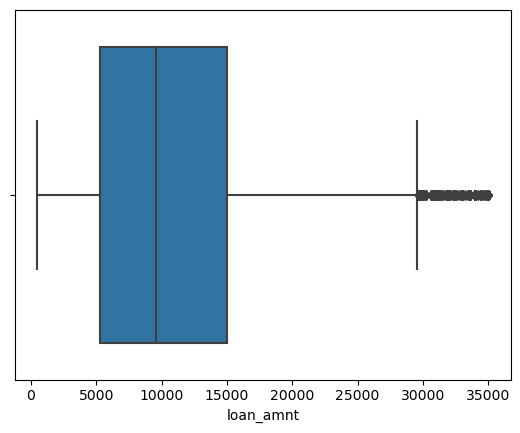

In [732]:
#Univariate analysis

loan_amnt = loan['loan_amnt']

sns.boxplot(x=loan_amnt, data=loan);


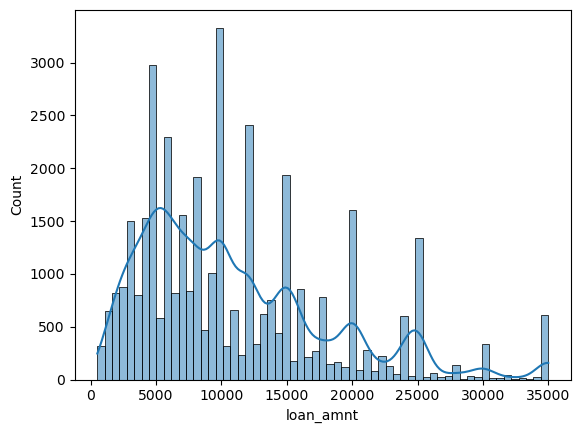

In [733]:
sns.histplot(x=loan_amnt, data=loan, kde=True);


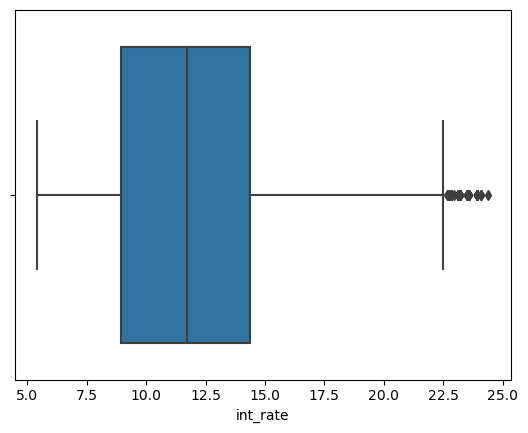

In [734]:
int_rate = loan['int_rate']

sns.boxplot(x=int_rate, data=loan);


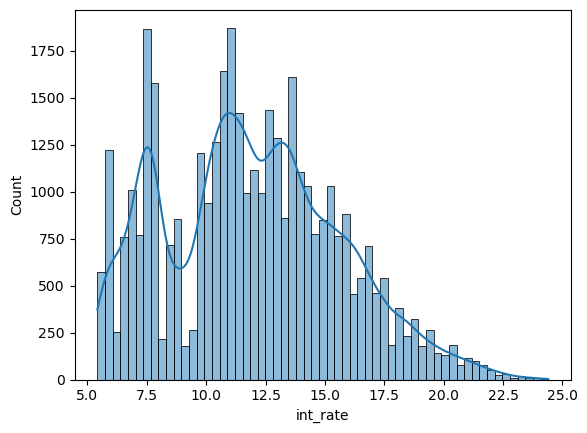

In [735]:
sns.histplot(x=int_rate, data=loan, kde=True);

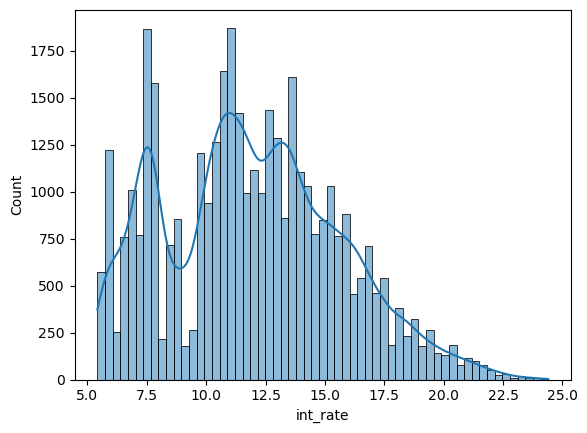

In [736]:
int_rate = loan['int_rate']

sns.histplot(x=int_rate, data=loan, kde = True);

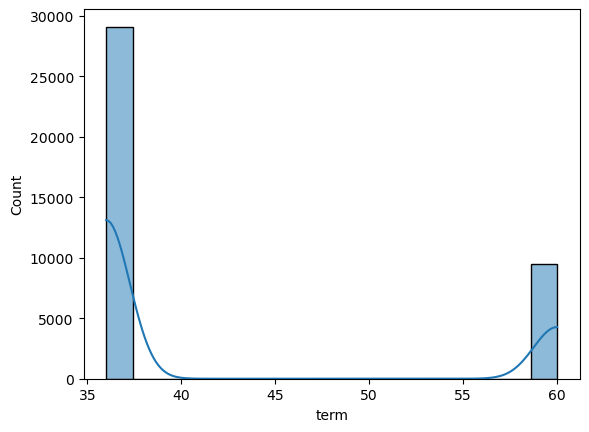

In [737]:
term = loan['term']

sns.histplot(x=term, data=loan, kde = True);

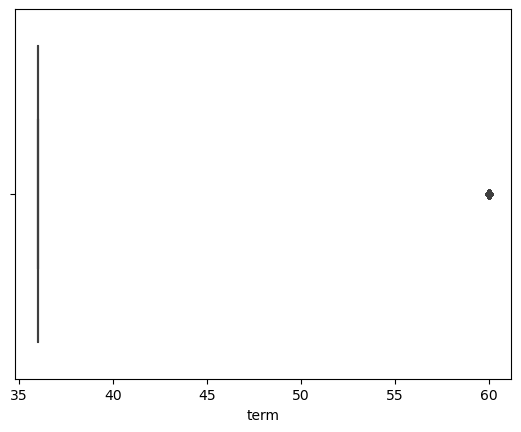

In [738]:
sns.boxplot(x=term, data=loan);


Fully Paid     85.4%
Charged Off    14.6%
Name: loan_status, dtype: object


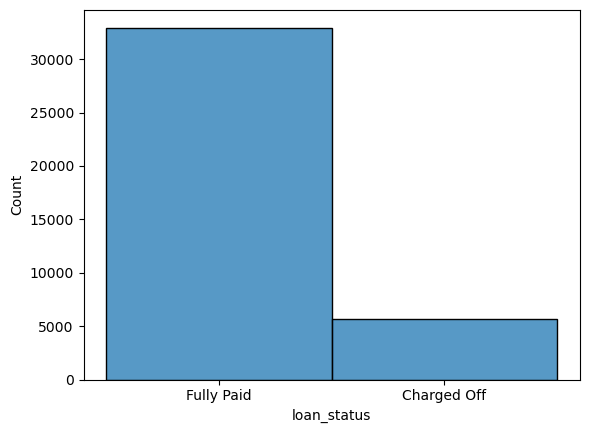

In [739]:
loan_status = loan['loan_status']

print((loan.loan_status.value_counts(normalize=True)*100).round(1).astype(str) + '%')

sns.histplot(x=loan_status, data=loan);


debt_consolidation    46.8%
credit_card           13.0%
other                 10.0%
home_improvement       7.5%
major_purchase         5.6%
small_business         4.5%
car                    3.9%
wedding                2.4%
medical                1.8%
moving                 1.5%
vacation               1.0%
house                  1.0%
educational            0.8%
renewable_energy       0.3%
Name: purpose, dtype: object


[Text(0, 0, 'credit_card'),
 Text(1, 0, 'car'),
 Text(2, 0, 'small_business'),
 Text(3, 0, 'other'),
 Text(4, 0, 'wedding'),
 Text(5, 0, 'debt_consolidation'),
 Text(6, 0, 'home_improvement'),
 Text(7, 0, 'major_purchase'),
 Text(8, 0, 'medical'),
 Text(9, 0, 'moving'),
 Text(10, 0, 'vacation'),
 Text(11, 0, 'house'),
 Text(12, 0, 'renewable_energy'),
 Text(13, 0, 'educational')]

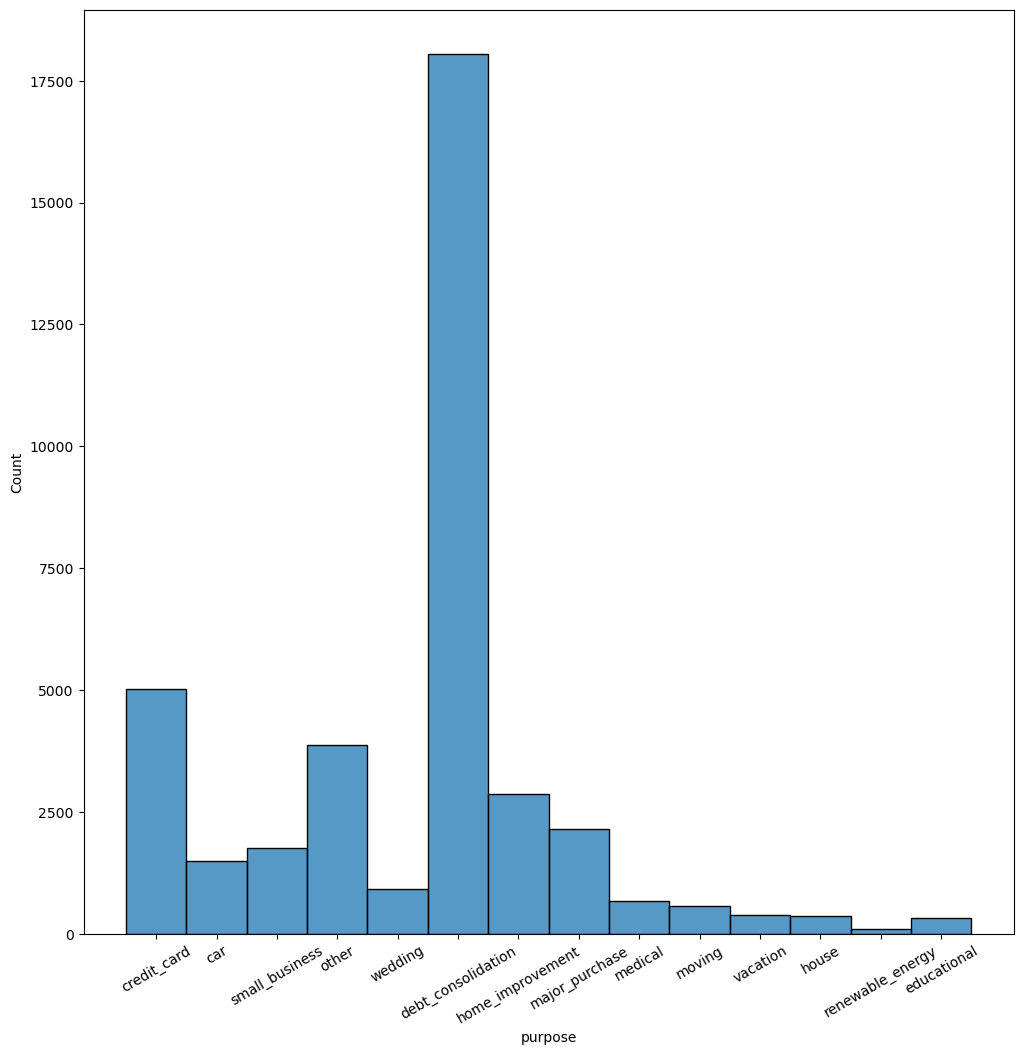

In [740]:
#Analyzing Purpose column - univariate analysis - Categorical Variable
loan_purpose = loan['purpose']

print((loan.purpose.value_counts(normalize=True)*100).round(1).astype(str) + '%')

plt.figure(figsize=(12,12))

plot = sns.histplot(x=loan_purpose, data=loan);


plot.set_xticklabels(plot.get_xticklabels(), rotation=30)



B    30.3%
A    26.0%
C    20.3%
D    13.2%
E     6.9%
F     2.5%
G     0.8%
Name: grade, dtype: object


<Axes: xlabel='grade', ylabel='count'>

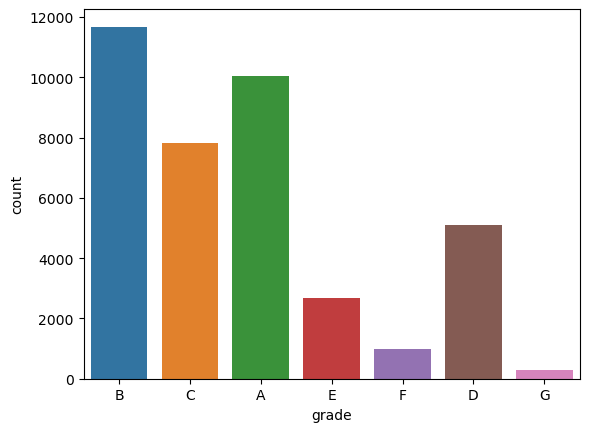

In [741]:
#Analyzing Grade column - univariate analysis - Categorical variable

print((loan['grade'].value_counts(normalize=True)*100).round(1).astype(str) + '%')

sns.countplot(x = loan['grade'], data = loan)

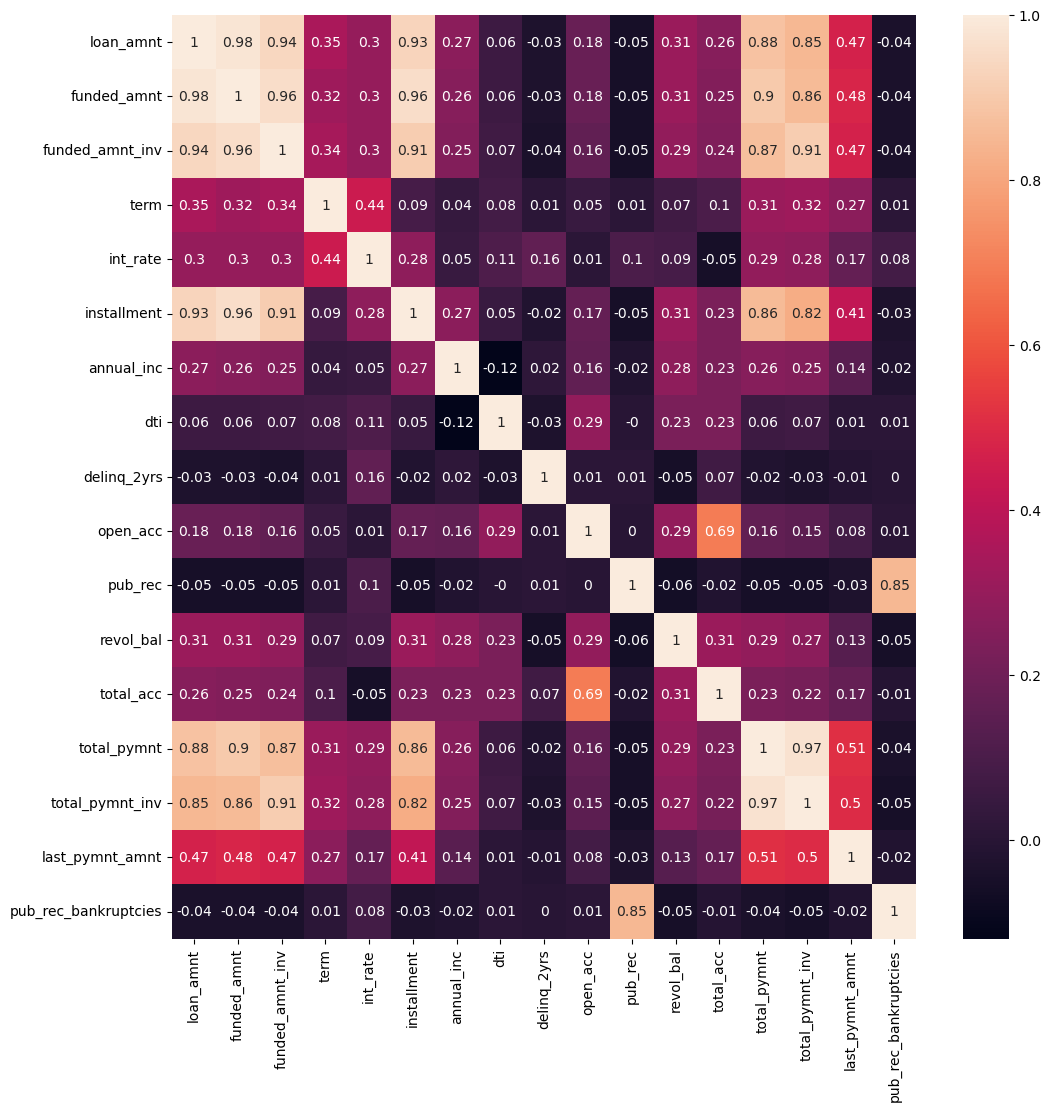

In [742]:
#Multivariate analysis. Plotting all continuous variables in heatmap to see the coorelation to each other

ax = plt.subplots(figsize=(12,12))

sns.heatmap(loan.corr().round(2), annot=True);


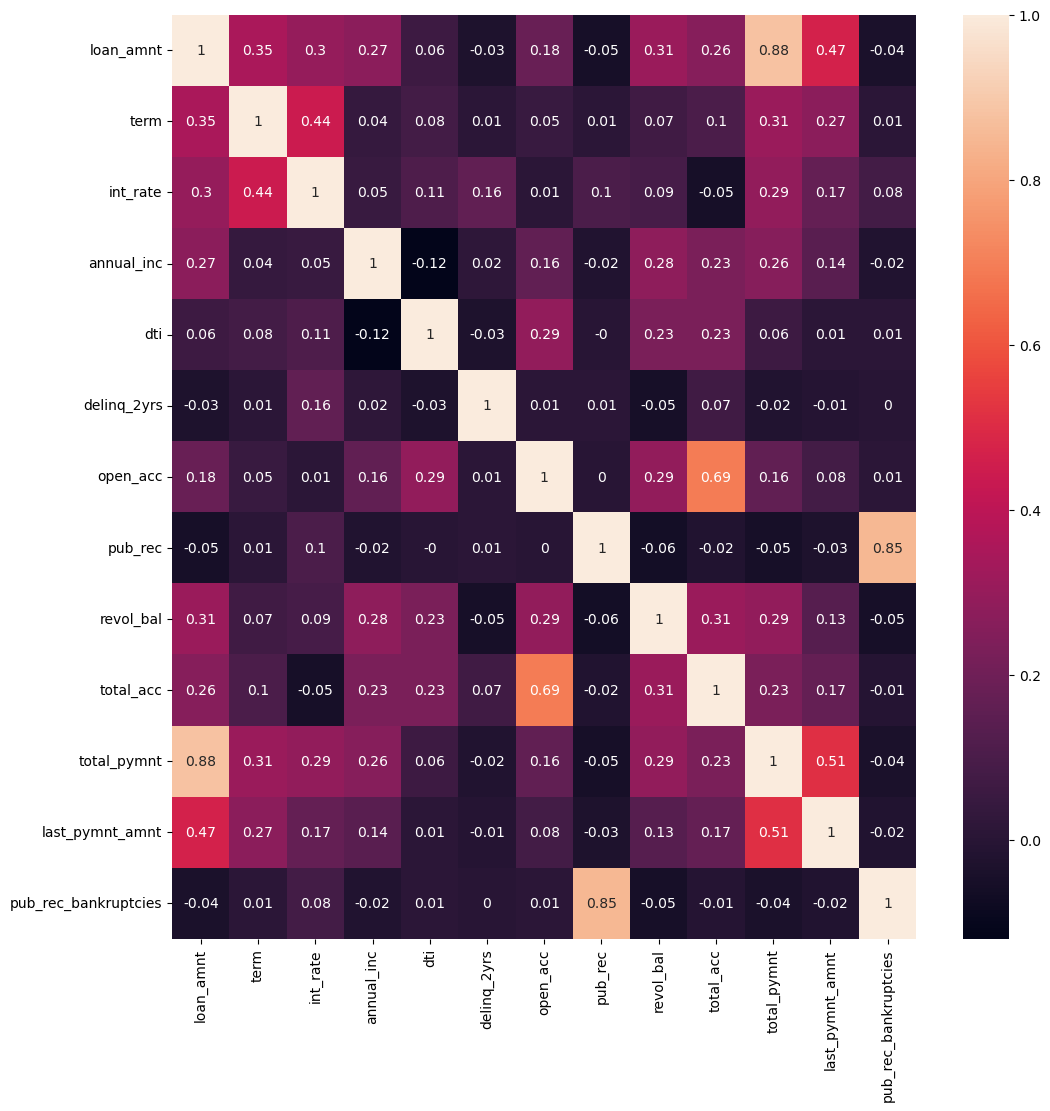

In [743]:
#dropping funded_amnt, funded_amnt_inv and installment from the analysis as they are very highly related to loan_amnt values

#dropping total_pymnt_inv as its highly related to total_pymnt values


loan.drop(['funded_amnt', 'funded_amnt_inv', 'installment', 'total_pymnt_inv'], axis = 1, inplace = True)

ax = plt.subplots(figsize=(12,12))

sns.heatmap(loan.corr().round(2), annot=True);

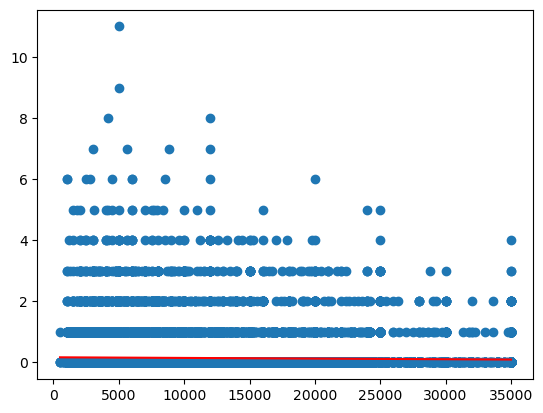

-0.0319514796637374


In [744]:
# plot delinq_2 with annual income and loan_amnt

#plt.figure(figsize=(16,12))
loan_amnt = loan ['loan_amnt'].astype('float')
delinq_2yrs = loan['delinq_2yrs'].astype('float')

plt.scatter(loan_amnt, delinq_2yrs)

plt.plot(np.unique(loan_amnt), np.poly1d(np.polyfit(loan_amnt, delinq_2yrs, 1))
         (np.unique(loan_amnt)), color='red')

plt.show()

correlation = delinq_2yrs.corr(loan_amnt)

print(correlation)

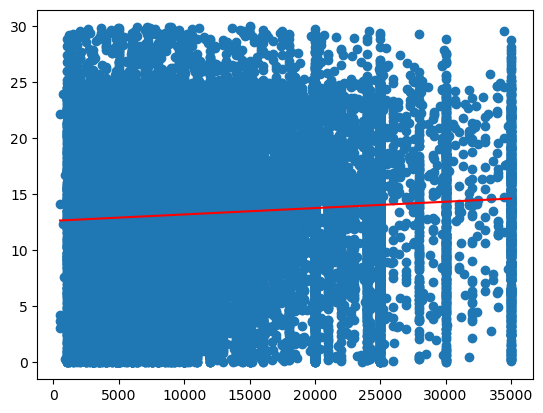

-0.0319514796637374


In [745]:
# plot delinq_2 with dti and loan_amnt

#plt.figure(figsize=(16,12))
loan_amnt = loan ['loan_amnt'].astype('float')
dti = loan['dti'].astype('float')

plt.scatter(loan_amnt, dti)

plt.plot(np.unique(loan_amnt), np.poly1d(np.polyfit(loan_amnt, dti, 1))
         (np.unique(loan_amnt)), color='red')

plt.show()

correlation = delinq_2yrs.corr(loan_amnt)

print(correlation)

In [746]:
loan.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,...,3,0,13648,83.70%,9,5863.155187,Jan-15,171.62,May-16,0.0
1,2500,60,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,...,3,0,1687,9.40%,4,1008.710000,Apr-13,119.66,Sep-13,0.0
2,2400,36,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,...,2,0,2956,98.50%,10,3005.666844,Jun-14,649.91,May-16,0.0
3,10000,36,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,...,10,0,5598,21%,37,12231.890000,Jan-15,357.48,Apr-16,0.0
5,5000,36,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,...,9,0,7963,28.30%,12,5632.210000,Jan-15,161.03,Jan-16,0.0


<Axes: xlabel='loan_status', ylabel='term'>

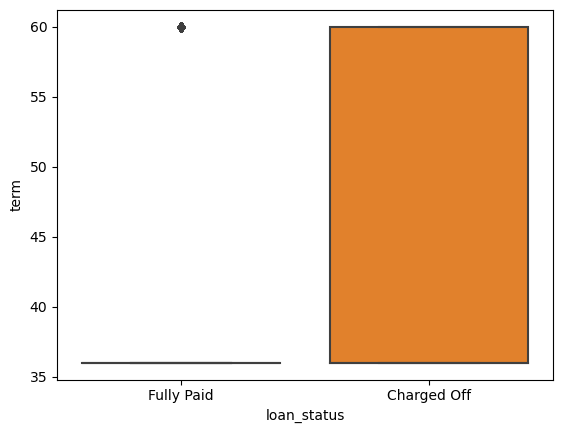

In [747]:
#Bivariate analyis
#Analyzing the relationship between loan status and term

loan_status = loan['loan_status']
term = loan['term']

sns.boxplot(x=loan_status,y=term,data=loan)


<Axes: xlabel='loan_status', ylabel='annual_inc'>

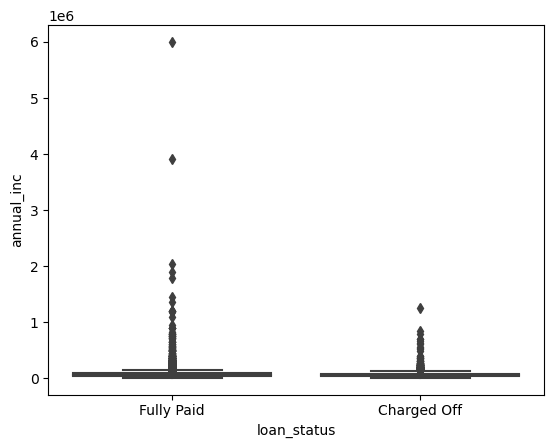

In [748]:
#Analyzing the relationship between loan status and salary

sns.boxplot(x=loan['loan_status'],y=loan['annual_inc'],data=loan)

<Axes: xlabel='loan_status', ylabel='annual_inc'>

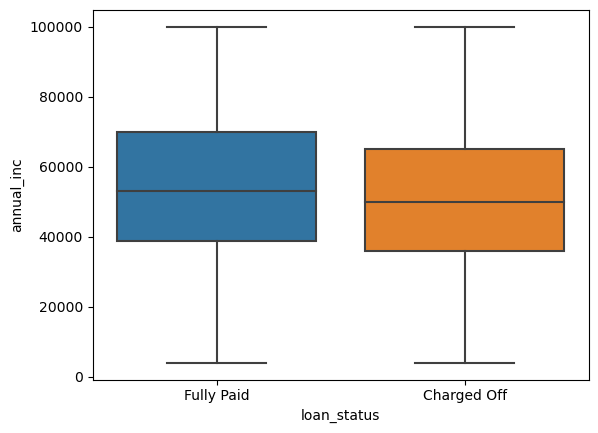

In [749]:
#Removing outliers of annual income
tempdata = loan[loan['annual_inc'] < 100000]

sns.boxplot(x=tempdata['loan_status'],y=tempdata['annual_inc'],data=tempdata)

<Axes: xlabel='loan_status', ylabel='int_rate'>

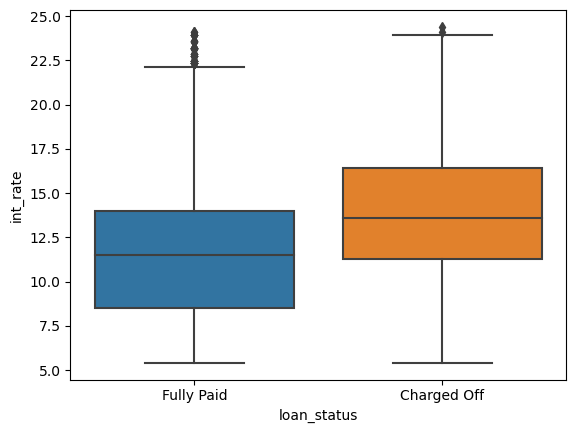

In [750]:
#Analyzing the relationship between loan status and interest rate

sns.boxplot(x=loan['loan_status'],y=loan['int_rate'],data=loan)

loan_status  Charged Off  Fully Paid
grade                               
A                    602        9443
B                   1425       10250
C                   1347        6487
D                   1118        3967
E                    715        1948
F                    319         657
G                    101         198


<Axes: xlabel='grade'>

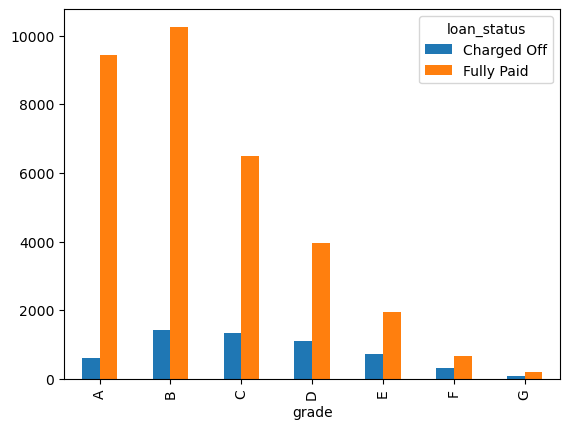

In [752]:
#Analyzing the relationship between loan status and grade
#crosstab

CrosstabResult=pd.crosstab(index=loan['grade'],columns=loan['loan_status'])

print(CrosstabResult)

CrosstabResult.plot.bar()

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                2142       14552
Source Verified             1434        8243
Verified                    2051       10155


<Axes: xlabel='verification_status'>

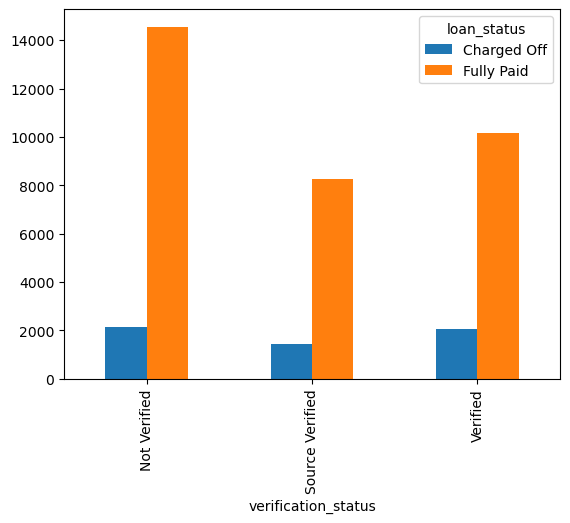

In [753]:
#Analyzing the relationship between loan status and Verification status
#crosstab

CrosstabResult=pd.crosstab(index=loan['verification_status'],columns=loan['loan_status'])

print(CrosstabResult)

CrosstabResult.plot.bar()